# Comparing Suburbs and Identifying Clusters

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

## Data Imports

In [2]:
# 2018-2019 data
df = pd.read_excel(open('data/ts19individual06taxablestatusstateterritorypostcode.xlsx', 'rb'),sheet_name='Table 6A', skiprows=1)

In [3]:
df = df.dropna()
df.head()

,Taxable status,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,...,Low income tax offset\n$,Low and middle income tax offset\nno.,Low and middle income tax offset\n$,People with private health insurance\nno.,Private health insurance - your Australian Government rebate received\nno.,Private health insurance - your Australian Government rebate received\n$,Private health insurance rebate\nno.,Private health insurance rebate\n$,Excess private health reduction or refund (rebate reduced)\nno.,Excess private health reduction or refund (rebate reduced)\n$
0,Non Taxable,ACT,2600,1050,1006,12648452,259,610116,13,21049,...,59971,95,22502,742,468,430084,62,34128,53,25386
1,Non Taxable,ACT,2601,1173,1136,9900103,154,176445,3,6188,...,36461,44,8931,377,127,77225,30,10380,7,2297
2,Non Taxable,ACT,2602,4194,4054,52275968,1182,1362902,19,11577,...,265181,404,99011,2175,1294,884597,172,60678,123,42080
3,Non Taxable,ACT,2603,1060,1003,12662531,302,485408,8,9183,...,68818,114,27038,682,418,346810,46,20473,55,26914
4,Non Taxable,ACT,2604,1224,1176,15351889,353,503655,20,16766,...,77744,116,31954,685,448,332876,65,29331,65,18541


## NSW Dataframe

In [4]:
df_nsw = df[df['State/ Territory1'] == 'NSW']
df_nsw.head()

,Taxable status,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,...,Low income tax offset\n$,Low and middle income tax offset\nno.,Low and middle income tax offset\n$,People with private health insurance\nno.,Private health insurance - your Australian Government rebate received\nno.,Private health insurance - your Australian Government rebate received\n$,Private health insurance rebate\nno.,Private health insurance rebate\n$,Excess private health reduction or refund (rebate reduced)\nno.,Excess private health reduction or refund (rebate reduced)\n$
29,Non Taxable,NSW,1225,10,10,-429822,1,993,0,0,...,0,0,0,5,4,2184,1,610,0,0
30,Non Taxable,NSW,1230,20,19,64076,7,5519,0,0,...,1343,1,255,12,12,12211,1,26,0,0
31,Non Taxable,NSW,1235,22,19,-60906,4,3375,0,0,...,735,1,207,10,9,9295,1,89,0,0
32,Non Taxable,NSW,1240,21,18,41732,4,1584,0,0,...,1116,2,468,6,6,3081,0,0,1,481
33,Non Taxable,NSW,1335,14,13,38233,2,1583,0,0,...,0,0,0,10,9,7699,1,6,2,619


### Taxable Income or Loss

In [5]:
df_nsw_taxable_income = df_nsw[['Postcode', 'Taxable income or loss3\n$']].copy()
df_nsw_taxable_income = df_nsw_taxable_income.rename(columns={'Taxable income or loss3\n$': 'Taxable income or loss'})
df_nsw_taxable_income = df_nsw_taxable_income[df_nsw_taxable_income['Postcode'] != 'NSW other']
df_nsw_taxable_income

,Postcode,Taxable income or loss
29,1225,-429822
30,1230,64076
31,1235,-60906
32,1240,41732
33,1335,38233
...,...,...
3346,2878,7564444
3347,2879,12867368
3348,2880,485162220
3349,2898,19243790


In [6]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_nsw_taxable_income)
    sse.append(km.inertia_)

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


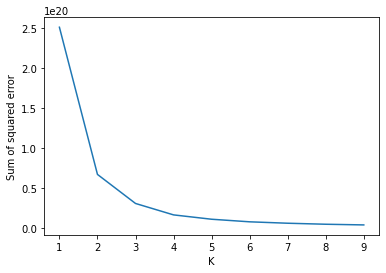

In [7]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [8]:
km = KMeans(n_clusters=4)
yp = km.fit_predict(df_nsw_taxable_income)

df_nsw_taxable_income['cluster'] = yp

df1 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==0]
df2 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==1]
df3 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==2]
df4 = df_nsw_taxable_income[df_nsw_taxable_income.cluster==3]

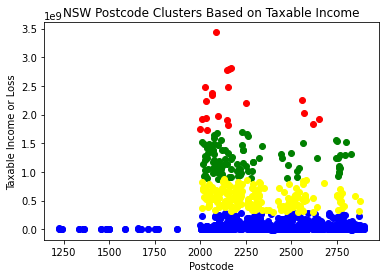

In [9]:
plt.title("NSW Postcode Clusters Based on Taxable Income")
plt.xlabel("Postcode")
plt.ylabel("Taxable Income or Loss")

plt.scatter(df1['Postcode'],df1['Taxable income or loss'],color='blue')
plt.scatter(df2['Postcode'],df2['Taxable income or loss'],color='green')
plt.scatter(df3['Postcode'],df3['Taxable income or loss'],color='yellow')
plt.scatter(df4['Postcode'],df4['Taxable income or loss'],color='red')

## Victoria Dataframe

In [10]:
df_vic = df[df['State/ Territory1'] == 'VIC']
df_vic

,Taxable status,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3\nno.,Taxable income or loss3\n$,Tax on taxable income\nno.,Tax on taxable income\n$,Medicare levy\nno.,Medicare levy\n$,...,Low income tax offset\n$,Low and middle income tax offset\nno.,Low and middle income tax offset\n$,People with private health insurance\nno.,Private health insurance - your Australian Government rebate received\nno.,Private health insurance - your Australian Government rebate received\n$,Private health insurance rebate\nno.,Private health insurance rebate\n$,Excess private health reduction or refund (rebate reduced)\nno.,Excess private health reduction or refund (rebate reduced)\n$
1605,Non Taxable,VIC,3000,8564,8020,80423510,1749,1291913,23,32704,...,521647,679,102719,1590,879,531109,281,75488,45,12490
1606,Non Taxable,VIC,3001,492,491,1142734,9,10081,0,0,...,1308,2,876,12,9,8006,0,0,0,0
1607,Non Taxable,VIC,3002,632,595,7633881,166,347141,3,9109,...,36607,50,10556,380,285,253309,52,24803,20,10025
1608,Non Taxable,VIC,3003,1230,1161,12594637,274,213688,1,1802,...,71977,96,14646,320,189,134110,44,10651,18,6843
1609,Non Taxable,VIC,3004,1900,1766,19178469,461,583456,15,16452,...,118371,174,31171,906,679,593366,131,40348,41,22525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,Taxable,VIC,3992,369,369,22292399,369,4369302,342,415326,...,81431,359,257267,118,107,57339,11,4200,21,7182
4980,Taxable,VIC,3995,3799,3799,226145040,3799,44019784,3493,4167384,...,885790,3592,2587001,1229,1102,682226,122,33829,265,108293
4981,Taxable,VIC,3996,2288,2288,163433473,2288,36221598,2131,3083833,...,441932,2042,1486464,1266,1163,804091,76,25450,341,161286
4982,Taxable,VIC,8007,34,34,4121930,34,1233033,28,79352,...,2617,14,8207,26,22,13368,2,886,16,5607


### Taxable Income or Loss

In [11]:
df_vic_taxable_income = df_vic[['Postcode', 'Taxable income or loss3\n$']].copy()
df_vic_taxable_income = df_vic_taxable_income.rename(columns={'Taxable income or loss3\n$': 'Taxable income or loss'})
df_vic_taxable_income = df_vic_taxable_income[df_vic_taxable_income['Postcode'] != 'VIC other']
df_vic_taxable_income = df_vic_taxable_income[df_vic_taxable_income['Postcode'] != 8007]
df_vic_taxable_income

,Postcode,Taxable income or loss
1605,3000,80423510
1606,3001,1142734
1607,3002,7633881
1608,3003,12594637
1609,3004,19178469
...,...,...
4977,3990,4397267
4978,3991,9608992
4979,3992,22292399
4980,3995,226145040


In [12]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_vic_taxable_income)
    sse.append(km.inertia_)

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


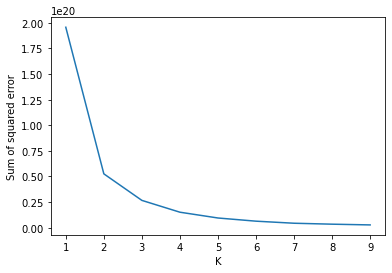

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [14]:
km = KMeans(n_clusters=4)
yp = km.fit_predict(df_vic_taxable_income)

df_vic_taxable_income['cluster'] = yp

df1 = df_vic_taxable_income[df_vic_taxable_income.cluster==0]
df2 = df_vic_taxable_income[df_vic_taxable_income.cluster==1]
df3 = df_vic_taxable_income[df_vic_taxable_income.cluster==2]
df4 = df_vic_taxable_income[df_vic_taxable_income.cluster==3]
df1.head()

,Postcode,Taxable income or loss,cluster
1605,3000,80423510,0
1606,3001,1142734,0
1607,3002,7633881,0
1608,3003,12594637,0
1609,3004,19178469,0


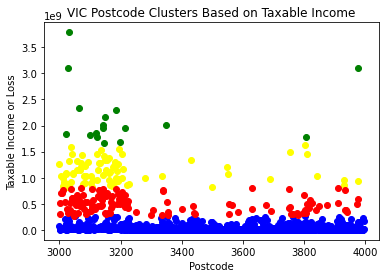

In [15]:
plt.title("VIC Postcode Clusters Based on Taxable Income")
plt.xlabel("Postcode")
plt.ylabel("Taxable Income or Loss")

plt.scatter(df1['Postcode'],df1['Taxable income or loss'],color='blue')
plt.scatter(df2['Postcode'],df2['Taxable income or loss'],color='green')
plt.scatter(df3['Postcode'],df3['Taxable income or loss'],color='yellow')
plt.scatter(df4['Postcode'],df4['Taxable income or loss'],color='red')